### k-means
The k-means algorithm minimizes the within-cluster variance, i.e. it reduces the sum of squared distances of each point to its cluster center.  

The algorithm is described as follows:  
1. guess some initial cluster centers (nowadays the default is k-means++ initialization)
2. while cluster centers did not converge:
  * assign each point to its nearest cluster center
  * compute cluster centers as the mean of the points in the cluster

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import numpy as np

from ipywidgets import interact
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs

def plot_kmeans_interactive(min_clusters=1, max_clusters=6):
    X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=0.60)
        
    def plot_points(X, labels, n_clusters):
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis',
                    vmin=0, vmax=n_clusters - 1);
            
    def plot_centers(centers):
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c=np.arange(centers.shape[0]),
                    s=200, cmap='viridis')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c='black', s=50)
            

    def _kmeans_step(frame=0, n_clusters=4):
        rng = np.random.RandomState(2)
        labels = np.zeros(X.shape[0])
        centers = rng.randn(n_clusters, 2)

        nsteps = frame // 3

        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                labels = pairwise_distances_argmin(X, centers)

            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]

        # plot the data and cluster centers
        plot_points(X, labels, n_clusters)
        plot_centers(old_centers)

        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], 
                             arrowprops=dict(arrowstyle='->', linewidth=1))
            plot_centers(centers)

        plt.xlim(-4, 4)
        plt.ylim(-2, 10)

        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Reassign points to nearest centroid",
                     ha='right', va='top', size=14)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Update centroids to cluster means",
                     ha='right', va='top', size=14)
    
    return interact(_kmeans_step, frame=[0, 50],
                    n_clusters=[min_clusters, max_clusters])

plot_kmeans_interactive();

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


interactive(children=(Dropdown(description='frame', options=(0, 50), value=0), Dropdown(description='n_cluster…

inertia: 290.54993458210106
inertia: 212.13273203555485
inertia: 212.00599621083478


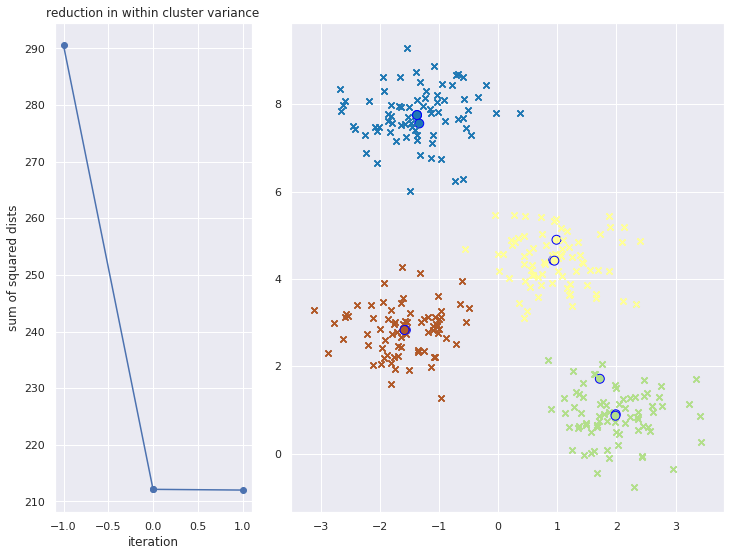

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling
import numpy as np
from ipywidgets import interact
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.gridspec as gridspec
from sklearn.cluster import KMeans
from itertools import chain
import matplotlib.animation as animation    
from IPython.display import HTML

# make data
X, y = make_blobs(n_samples=300, centers=4,
                      random_state=0, cluster_std=0.60)

fig = plt.figure(figsize=(12, 9))
G = gridspec.GridSpec(1, 3)  
axes_1 = plt.subplot(G[0, 0])
axes_1.set_xlabel('iteration')
axes_1.set_ylabel('sum of squared dists')
axes_1.set_title('reduction in within cluster variance')
#pl.xticks(np.arange(0, n_estimators, 1.0))
axes_2 = plt.subplot(G[0, 1:3])
mycmap=plt.cm.Paired
colors = [np.array([mycmap(1)]), np.array([mycmap(10)]), np.array([mycmap(2)]), np.array([mycmap(20)])]
km = KMeans(n_clusters = 4, init = np.array([[min(X[:, 0]), max(X[:, 1])],
                                             [max(X[:, 0]), max(X[:, 1])], 
                                             [max(X[:, 0]), min(X[:, 1])], 
                                             [min(X[:, 0]), min(X[:, 1])]]),\
            n_init=1, max_iter=1).fit(X)
print(f'inertia: {km.inertia_}')
idx0 = np.where(km.labels_== 0)[0]
idx1 = np.where(km.labels_== 1)[0]
idx2 = np.where(km.labels_== 2)[0]
idx3 = np.where(km.labels_== 3)[0]

axes_2.scatter(X[idx0, 0], X[idx0,1], marker = 'x', c=colors[0], edgecolors = colors[0])
axes_2.scatter(X[idx1, 0], X[idx1,1], marker = 'x', c=colors[1], edgecolors = colors[1])
axes_2.scatter(X[idx2, 0], X[idx2,1], marker = 'x', c=colors[2], edgecolors = colors[2])
axes_2.scatter(X[idx3, 0], X[idx3,1], marker = 'x', c=colors[3], edgecolors = colors[3])
axes_2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker= 'o',\
               c = np.array(colors).reshape((4, 4)), edgecolors = 'blue', s=80)

inertia = km.inertia_

def init():
    return []

def run(j):
    global km
    global inertia
    
    km = KMeans(n_clusters = 4, init = km.cluster_centers_, n_init=1, max_iter=1).fit(X)
    if inertia == km.inertia_:
        return
    
    axes_1.plot([j-1, j], [inertia, km.inertia_], '-bo')
    inertia = km.inertia_
    idx0 = np.where(km.labels_== 0)[0]
    idx1 = np.where(km.labels_== 1)[0]
    idx2 = np.where(km.labels_== 2)[0]
    idx3 = np.where(km.labels_== 3)[0]

    axes_2.scatter(X[idx0, 0], X[idx0,1], marker = 'x', c=colors[0], edgecolors = colors[0])
    axes_2.scatter(X[idx1, 0], X[idx1,1], marker = 'x', c=colors[1], edgecolors = colors[1])
    axes_2.scatter(X[idx2, 0], X[idx2,1], marker = 'x', c=colors[2], edgecolors = colors[2])
    axes_2.scatter(X[idx3, 0], X[idx3,1], marker = 'x', c=colors[3], edgecolors = colors[3])
    axes_2.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker= 'o',\
                   c = np.array(colors).reshape((4, 4)), edgecolors = 'blue', s=80)
    
    print(f'inertia: {inertia}')
    #plt.show()    

ani = animation.FuncAnimation(fig, func = run, init_func = init, frames = np.arange(0, 7),
                       interval = 200,  blit = False)     

#ani.save('/home/martin/overfit_random_forest.gif', writer = 'imagemagick', fps = 2)
HTML(ani.to_jshtml())    
#plt.show()

In [ ]:
init = np.array([[min(X[:, 0]), max(X[:, 1])],
                                             [max(X[:, 0]), max(X[:, 1])], 
                                             [max(X[:, 0]), min(X[:, 1])], 
                                             [min(X[:, 0]), min(X[:, 1])]])
init

array([[-3.12240736,  9.28293222],
       [ 3.43761754,  9.28293222],
       [ 3.43761754, -0.76589199],
       [-3.12240736, -0.76589199]])

## Rand Index
The rand index is a measure of how well to partitions of a set of objects coincide:
$$R=\frac{a + b}{a + b + c + d} = \frac{a + b}{n \choose2}, $$
where  
$a$ is the number of pairs of elements that are in the same subset for both partitions  
$b$ is the number of pairs of elements that are in different subsets for both partitions  
$c$ is the number of pairs of elements that are in the same subset for the first partition but not for the second   
$d$ is the number of pairs of elements that are in the different subsets for the first partition but in the same subset for the second partition  

The Rand index is the percentage of consistent/congruent decisions for the two partitions.

In [19]:
X, y = datasets.load_wine(return_X_y=True, as_frame=True)
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [87]:
X, y = datasets.load_wine(return_X_y=True, as_frame=True)
variables = ['alcohol', 'alcalinity_of_ash', 'color_intensity']
X = X[variables]

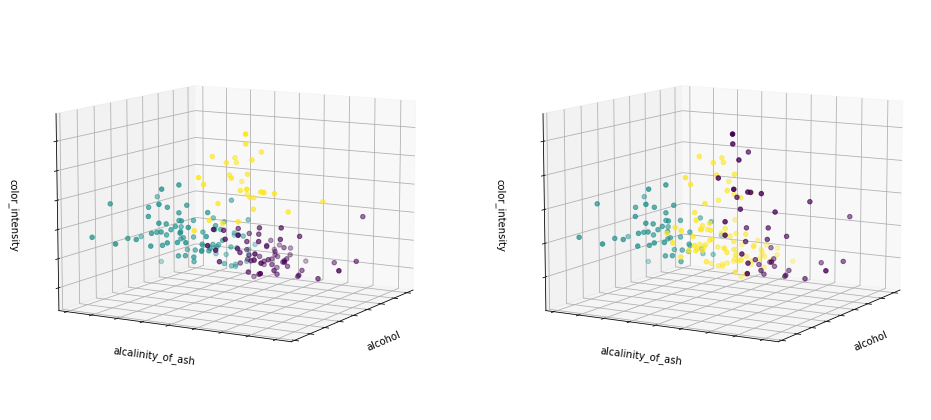

In [88]:
km = KMeans(n_clusters=3).fit(X)
labels = km.labels_

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121,projection='3d')
ax.scatter(X[variables[0]], X[variables[1]], X[variables[2]], c=labels)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('alcohol')
ax.set_ylabel('alcalinity_of_ash')
ax.set_zlabel('color_intensity')
ax.view_init(10, 30)

X[variables[2]] = zscore(X[variables[2]])
km = KMeans(n_clusters=3).fit(X)
labels = km.labels_

ax = fig.add_subplot(122,projection='3d')
ax.scatter(X[variables[0]], X[variables[1]], X[variables[2]], c=labels)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('alcohol')
ax.set_ylabel('alcalinity_of_ash')
ax.set_zlabel('color_intensity')
ax.view_init(10, 30)


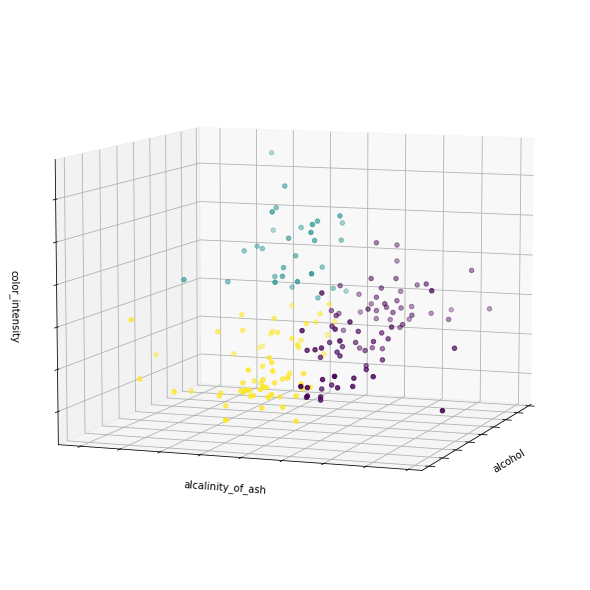

In [79]:
%matplotlib inline

from sklearn import datasets, cluster
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# load data
# do the clustering
km = KMeans(n_clusters=3).fit(X)
labels = km.labels_


#plot the clusters in color
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()
plt.gca().set_aspect('auto', adjustable='box')
ax.scatter(X[variables[0]], X[variables[1]], X[variables[2]], c=labels)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('alcohol')
ax.set_ylabel('alcalinity_of_ash')
ax.set_zlabel('color_intensity')

plt.show()




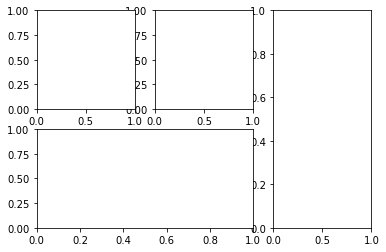

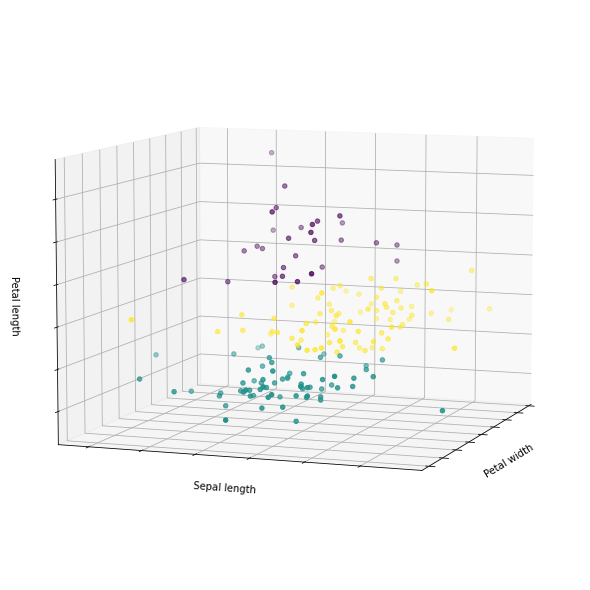

In [80]:
from scipy.stats import zscore
import pandas as pd

X[variables[1]] = zscore(X[variables[1]])
km = KMeans(n_clusters=3).fit(X)
labels = km.labels_
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()
ax.scatter(X[variables[0]], X[variables[1]], X[variables[2]], c=labels)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

plt.show()

In [77]:
X.head()

,alcohol,alcalinity_of_ash,color_intensity
0,1.518613,-1.169593,0.251717
1,0.246290,-2.490847,-0.293321
2,0.196879,-0.268738,0.269020
3,1.691550,-0.809251,1.186068
4,0.295700,0.451946,-0.319276


In [57]:
Z.head()

,dim1,dim2,dim3
0,0.713902,1.835266,0.928377
1,0.035304,0.042605,-0.111669
2,0.875248,0.353464,-0.451700
3,1.810722,-1.228129,-0.624836
4,-0.067173,-0.295071,-1.212752


In [58]:
X.head()

,dim1,dim2,dim3
0,3.596057,0.319084,2.092724
1,2.834083,-1.203199,1.186928
2,3.777226,-0.939225,0.890788
3,4.827636,-2.282273,0.740001
4,2.719016,-1.489944,0.227974
